# Funkcje do operacji na wynikach

In [12]:
import csv
import matplotlib.pyplot as plt


def read_csv(filepath):
    with open(filepath, 'r') as file:
        reader = csv.DictReader(file, delimiter=';')
        data = [row for row in reader]
    return data

def calculate_min_max_avg(data):
    total = {'Planks': 0, 'Wagons': 0, 'Wheels': 0, 'Passengers': 0}
    min_values = {'Planks': float('inf'), 'Wagons': float('inf'), 'Wheels': float('inf'), 'Passengers': float('inf')}
    max_values = {'Planks': float('-inf'), 'Wagons': float('-inf'), 'Wheels': float('-inf'), 'Passengers': float('-inf')}
    repeat = int(data[0]['Repeat']) if data else 0
    for row in data:
        for key in total.keys():
            value = int(row[key])
            total[key] += value
            min_values[key] = min(min_values[key], value)
            max_values[key] = max(max_values[key], value)
    averages = {key: total[key] / repeat for key in total.keys()}
    return min_values, max_values, averages

def plot_data(min_values_dict, max_values_dict, averages_dict, x_values):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, key in enumerate(averages_dict.keys()):
        axs[i].plot(x_values, min_values_dict[key], label='Min ' + key)
        axs[i].plot(x_values, max_values_dict[key], label='Max ' + key)
        axs[i].plot(x_values, averages_dict[key], label='Average ' + key)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('Number Of ' + key)
        axs[i].set_title('Number Of ' + key + ' vs x')
        axs[i].legend(loc='upper left')
    plt.tight_layout()
    plt.show()

def calculate_and_plot(filepath, x_min, x_max, step):
    x = x_min 
    averages_dict = {'Planks': [], 'Wagons': [], 'Wheels': [], 'Passengers': []}
    min_values_dict = {'Planks': [], 'Wagons': [], 'Wheels': [], 'Passengers': []}
    max_values_dict = {'Planks': [], 'Wagons': [], 'Wheels': [], 'Passengers': []}
    x_values = []

    while x < x_max:
        data = read_csv(filepath + "{:.6f}".format(x) + ".csv")
        min_values, max_values, averages = calculate_min_max_avg(data)
        for key in averages.keys():
            averages_dict[key].append(averages[key])
            min_values_dict[key].append(min_values[key])
            max_values_dict[key].append(max_values[key])
        x_values.append(x)
        x += step

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))
    for i, key in enumerate(averages_dict.keys()):
        # Plot averages
        axs[0, i].plot(x_values, averages_dict[key], label='Average ' + key)
        axs[0, i].set_xlabel('x')
        axs[0, i].set_ylabel('Number Of ' + key)
        axs[0, i].set_title('Average Number Of ' + key + ' vs x')
        axs[0, i].legend(loc='upper left')

        # Plot max values
        axs[1, i].plot(x_values, max_values_dict[key], label='Max ' + key)
        axs[1, i].set_xlabel('x')
        axs[1, i].set_ylabel('Number Of ' + key)
        axs[1, i].set_title('Max Number Of ' + key + ' vs x')
        axs[1, i].legend(loc='upper left')

        # Plot min values
        axs[2, i].plot(x_values, min_values_dict[key], label='Min ' + key)
        axs[2, i].set_xlabel('x')
        axs[2, i].set_ylabel('Number Of ' + key)
        axs[2, i].set_title('Min Number Of ' + key + ' vs x')
        axs[2, i].legend(loc='upper left')

    plt.tight_layout()
    plt.show()


def plot_single_data(ax, data, title):
    x_values = [float(row['x']) for row in data]
    gf_values = [float(row['gf_value']) for row in data]

    ax.plot(x_values, gf_values)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('gf_value')
    ax.grid(True)

def plot_all_gf():
    files_and_titles = {
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Endpoint": "EndpointGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Cycle": "CycleGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Sequence": "SequenceGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Set": "SetGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Passenger": "PassengerGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Plank": "PlankGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/Wagon": "WagonGF Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/SetPassenger": "SetGF Passenger Plot",
        "cmake-build-debug/Results/GeneratingFunctions/Test_v1/TrainLen": "TrainGF Length Plot"
    }

    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()

    for ax, (filepath, title) in zip(axs, files_and_titles.items()):
        data = read_csv(filepath)
        plot_single_data(ax, data, title)

    plt.tight_layout()
    plt.show()



# Badanie ilości elementów

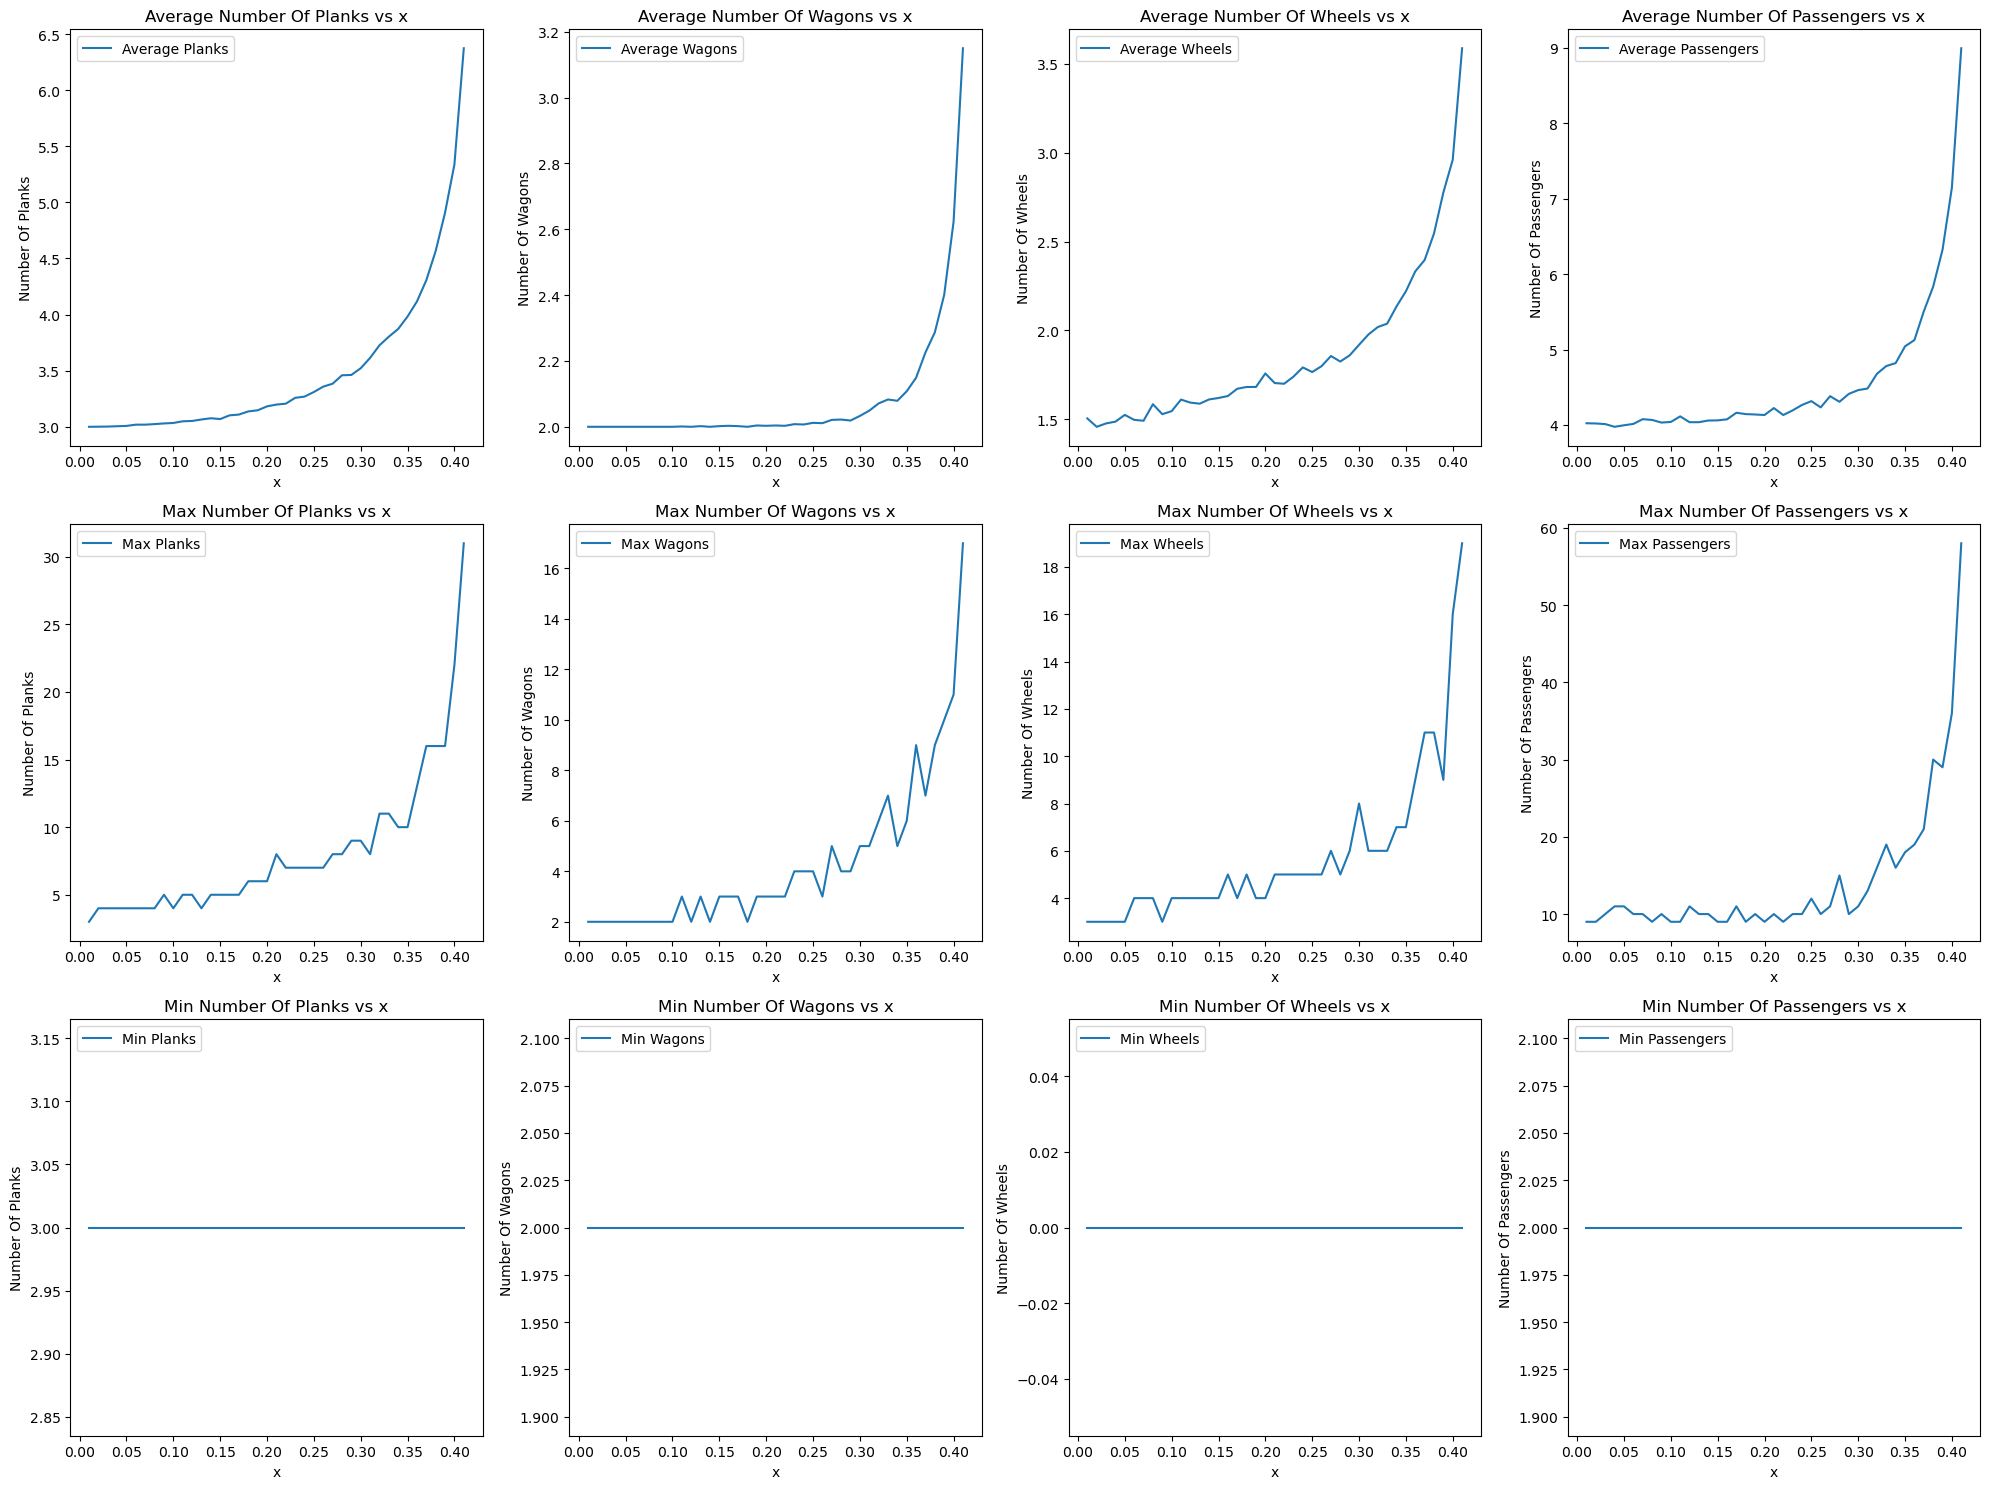

In [15]:

filepath = "cmake-build-debug/Results/Test_v2/X="
x_min = 0.010000
x_max = 0.420000
step = 0.010000

calculate_and_plot(filepath, x_min, x_max, step)

# Badanie wartości funkcji tworzących

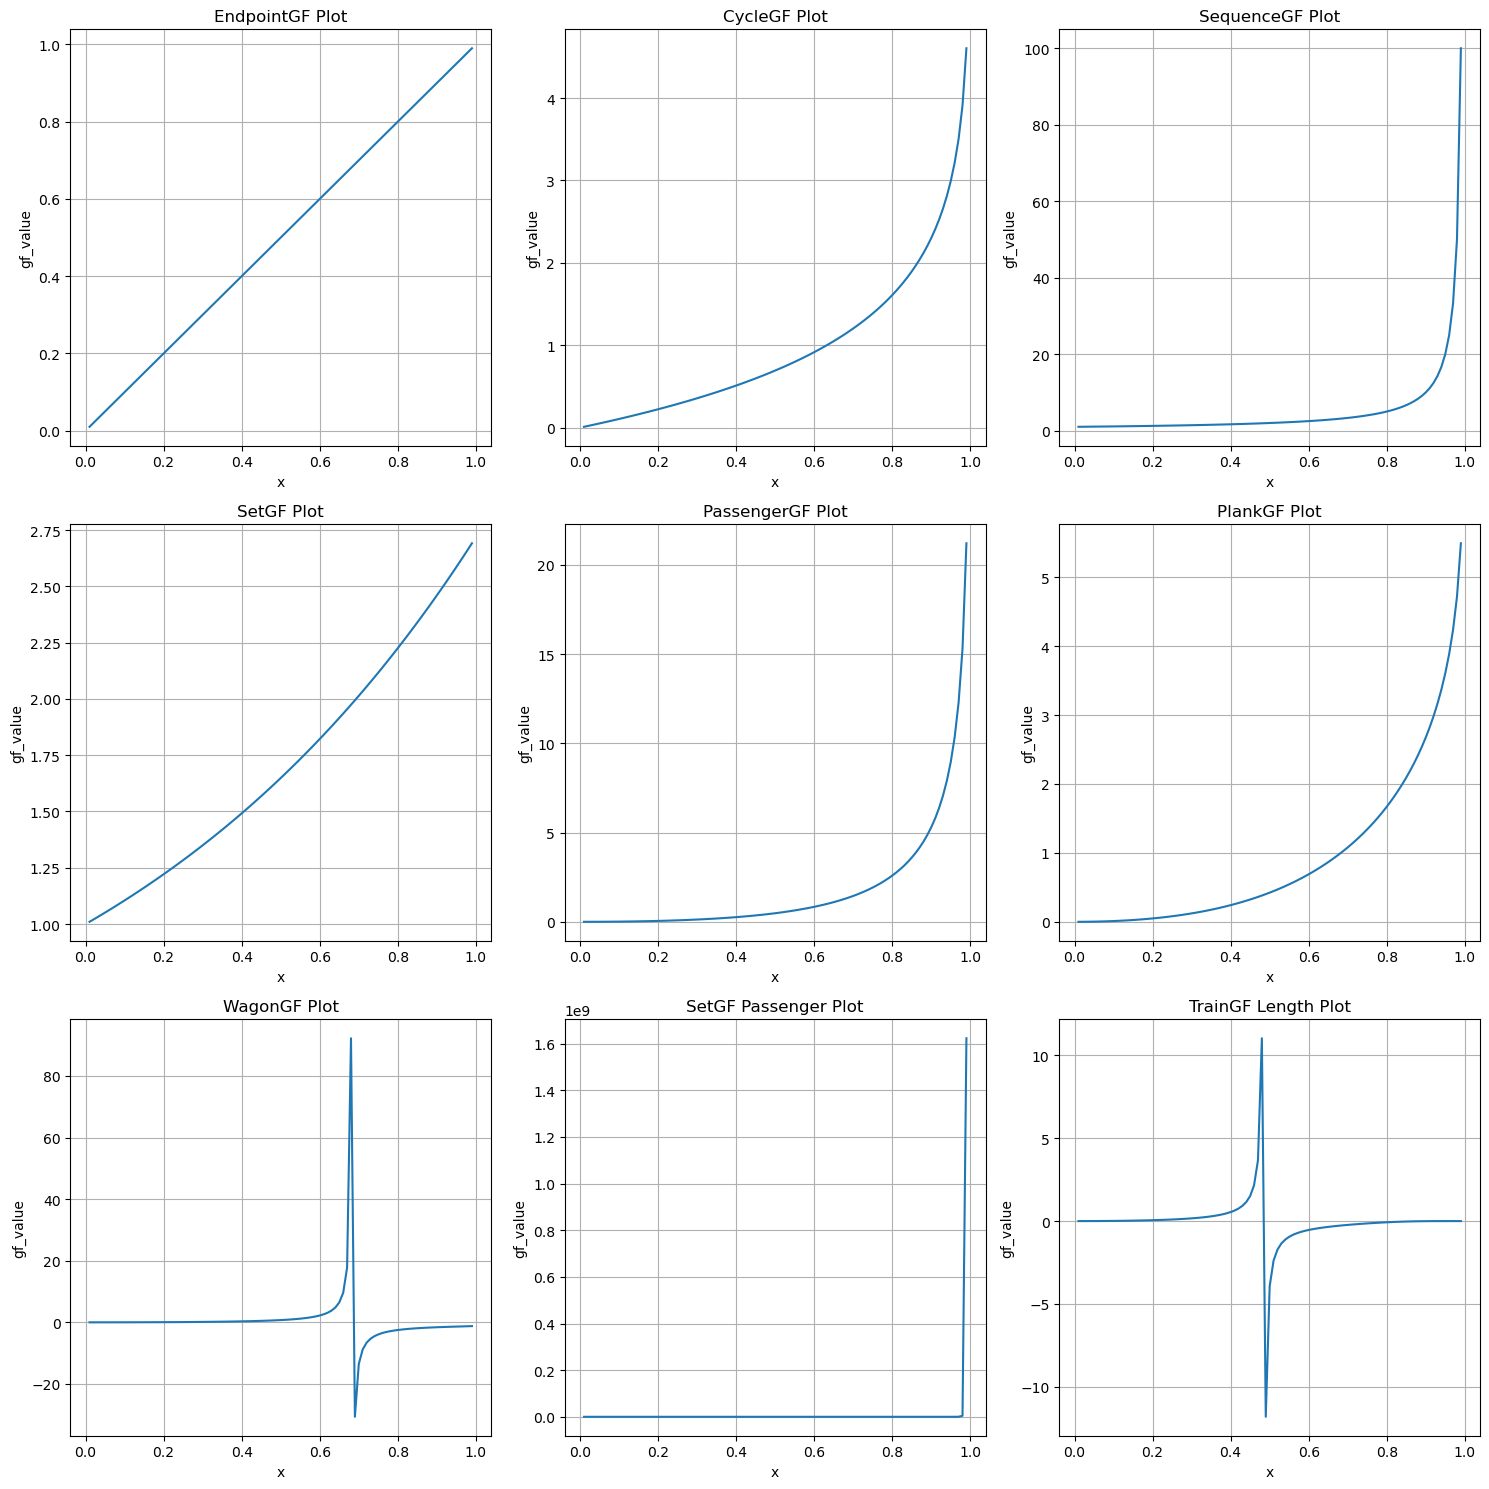

In [14]:
plot_all_gf()